# Prediction of The COVID-19 Pandemic in Nova Scotia
[Abstract] COVID-19 is a pandemic that has once outbroken worldwide. Such a pandemic has caused significant effect on Nova Scotians' Health and casted a series of social impact in our Healthcare Domain. This project would use the Auto Regressive (AR) Model and the Auto Regressive Integrated Moving Average (ARIMA) to predict the pandemic in Nova Scotia from June 2023 to August 2023, based on the data provided by https://health-infobase.canada.ca/covid-19/.

## 0. Prelude & Import Data

In [2]:
# basic packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests
pd.set_option('display.max_columns', None)

* The data is provided by https://health-infobase.canada.ca/covid-19/. You can download it through `Additional COVID-19 data resources -> cases and deaths data (.csv)` (https://health-infobase.canada.ca/src/data/covidLive/covid19-download.csv)<br>
* You can download the data through the link before importing the data in two following methods.
* For google colab user, please place the data into the `sample_data` folder!<br>
* For jupyterlab user, please place the data into the SAME directory as this ipynb file.<br>

In [3]:
# https://stackoverflow.com/questions/32400867/pandas-read-csv-from-url
url = "https://health-infobase.canada.ca/src/data/covidLive/covid19-download.csv"
s=requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))

## 1. Explore Data Analysis (EDA)

In [7]:
df.shape

(2820, 23)

In [8]:
df.head()

,pruid,prname,prnameFR,date,reporting_week,reporting_year,update,totalcases,numtotal_last7,ratecases_total,numdeaths,numdeaths_last7,ratedeaths,ratecases_last7,ratedeaths_last7,numtotal_last14,numdeaths_last14,ratetotal_last14,ratedeaths_last14,avgcases_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7
0,59,British Columbia,Colombie-Britannique,2020-01-18,3,2020,1.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,48,Alberta,Alberta,2020-01-18,3,2020,1.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,47,Saskatchewan,Saskatchewan,2020-01-18,3,2020,1.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,46,Manitoba,Manitoba,2020-01-18,3,2020,1.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,35,Ontario,Ontario,2020-01-18,3,2020,1.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [9]:
df.tail()

,pruid,prname,prnameFR,date,reporting_week,reporting_year,update,totalcases,numtotal_last7,ratecases_total,numdeaths,numdeaths_last7,ratedeaths,ratecases_last7,ratedeaths_last7,numtotal_last14,numdeaths_last14,ratetotal_last14,ratedeaths_last14,avgcases_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7
2815,60,Yukon,Yukon,2023-08-19,33,2023,0.0,5004,NaN,11427.53,32,NaN,73.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2816,61,Northwest Territories,Territoires du Nord-Ouest,2023-08-19,33,2023,0.0,11514,NaN,25247.23,22,NaN,48.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2817,62,Nunavut,Nunavut,2023-08-19,33,2023,0.0,3556,NaN,8774.61,7,NaN,17.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2818,99,Repatriated travellers,Voyageurs rapatriés,2023-08-19,33,2023,NaN,13,0.0,NaN,0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.00,NaN,0.00,NaN
2819,1,Canada,Canada,2023-08-19,33,2023,NaN,4706450,2845.0,12089.55,53345,30.0,137.03,7.31,0.08,4917.0,51.0,12.63,0.13,406.43,1.04,4.29,0.01


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pruid                2820 non-null   int64  
 1   prname               2820 non-null   object 
 2   prnameFR             2820 non-null   object 
 3   date                 2820 non-null   object 
 4   reporting_week       2820 non-null   int64  
 5   reporting_year       2820 non-null   int64  
 6   update               2444 non-null   float64
 7   totalcases           2820 non-null   int64  
 8   numtotal_last7       2588 non-null   float64
 9   ratecases_total      2632 non-null   float64
 10  numdeaths            2820 non-null   int64  
 11  numdeaths_last7      2554 non-null   float64
 12  ratedeaths           2632 non-null   float64
 13  ratecases_last7      2400 non-null   float64
 14  ratedeaths_last7     2366 non-null   float64
 15  numtotal_last14      2574 non-null   f

We are going to predict weekly cases in Nova Scotia (`numtotal_last7`).

1. The region that the spreadsheet compris

In [11]:
region = df['prname'].unique()
print(region)

['British Columbia' 'Alberta' 'Saskatchewan' 'Manitoba' 'Ontario' 'Quebec'
 'Newfoundland and Labrador' 'New Brunswick' 'Nova Scotia'
 'Prince Edward Island' 'Yukon' 'Northwest Territories' 'Nunavut'
 'Repatriated travellers' 'Canada']


Apart from the entire nation and "Repatriated travellers", all 13 provices are included here.

2. The data that the spreadsheet covers.

In [12]:
dates = df['date'].unique()
print(dates)
print(len(dates))

['2020-01-18' '2020-01-25' '2020-02-01' '2020-02-08' '2020-02-15'
 '2020-02-22' '2020-02-29' '2020-03-07' '2020-03-14' '2020-03-21'
 '2020-03-28' '2020-04-04' '2020-04-11' '2020-04-18' '2020-04-25'
 '2020-05-02' '2020-05-09' '2020-05-16' '2020-05-23' '2020-05-30'
 '2020-06-06' '2020-06-13' '2020-06-20' '2020-06-27' '2020-07-04'
 '2020-07-11' '2020-07-18' '2020-07-25' '2020-08-01' '2020-08-08'
 '2020-08-15' '2020-08-22' '2020-08-29' '2020-09-05' '2020-09-12'
 '2020-09-19' '2020-09-26' '2020-10-03' '2020-10-10' '2020-10-17'
 '2020-10-24' '2020-10-31' '2020-11-07' '2020-11-14' '2020-11-21'
 '2020-11-28' '2020-12-05' '2020-12-12' '2020-12-19' '2020-12-26'
 '2021-01-02' '2021-01-09' '2021-01-16' '2021-01-23' '2021-01-30'
 '2021-02-06' '2021-02-13' '2021-02-20' '2021-02-27' '2021-03-06'
 '2021-03-13' '2021-03-20' '2021-03-27' '2021-04-03' '2021-04-10'
 '2021-04-17' '2021-04-24' '2021-05-01' '2021-05-08' '2021-05-15'
 '2021-05-22' '2021-05-29' '2021-06-05' '2021-06-12' '2021-06-19'
 '2021-06-

Therefore, it is a weekly report covering from 2020-01-18 to 2023-08-19.

3. Select the data relevant to the project: Weekly Case in Nova Scotia from 2020-01-18 to 2023-08-19

In [13]:
ns_df = df[df['prname'] == 'Nova Scotia'][['date', 'numtotal_last7']]
ns_df.head()

,date,numtotal_last7
8,2020-01-18,0.0
23,2020-01-25,0.0
38,2020-02-01,0.0
53,2020-02-08,0.0
68,2020-02-15,0.0


In [14]:
ns_df.tail()

,date,numtotal_last7
2753,2023-07-22,NaN
2768,2023-07-29,NaN
2783,2023-08-05,NaN
2798,2023-08-12,NaN
2813,2023-08-19,NaN


In [15]:
ns_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 8 to 2813
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            188 non-null    object 
 1   numtotal_last7  176 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.4+ KB


It seems that there are some null values in weekly case

In [16]:
missing = ns_df[ns_df.isnull().any(axis = 1)]
missing

,date,numtotal_last7
2648,2023-06-03,NaN
2663,2023-06-10,NaN
2678,2023-06-17,NaN
2693,2023-06-24,NaN
2708,2023-07-01,NaN
2723,2023-07-08,NaN
2738,2023-07-15,NaN
2753,2023-07-22,NaN
2768,2023-07-29,NaN
2783,2023-08-05,NaN


The data from 2023-06-03 is missing, so this project will analyze the pandemic from 2020-01-18 to 2023-05-27 instead.

**~~Handling with missing data~~**

In [ ]:
# backward fill -- for time series data
# ns_df['numtotal_last7'] = ns_df['numtotal_last7'].bfill()
# ns_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 8 to 2813
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            188 non-null    object 
 1   numtotal_last7  176 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.4+ KB


In [ ]:
# forward fill -- for time series data
# ns_df['numtotal_last7'] = ns_df['numtotal_last7'].ffill()
# ns_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 8 to 2813
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            188 non-null    object 
 1   numtotal_last7  188 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.4+ KB


~~All the missing data is filled~~

In [17]:
ns_df = ns_df[~ns_df.isnull().any(axis = 1)]
ns_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 8 to 2633
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            176 non-null    object 
 1   numtotal_last7  176 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


In [18]:
# set Dtype of date as date
ns_df['date'] = pd.to_datetime(ns_df['date'])
ns_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 8 to 2633
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            176 non-null    datetime64[ns]
 1   numtotal_last7  176 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.1 KB


Visulize the data

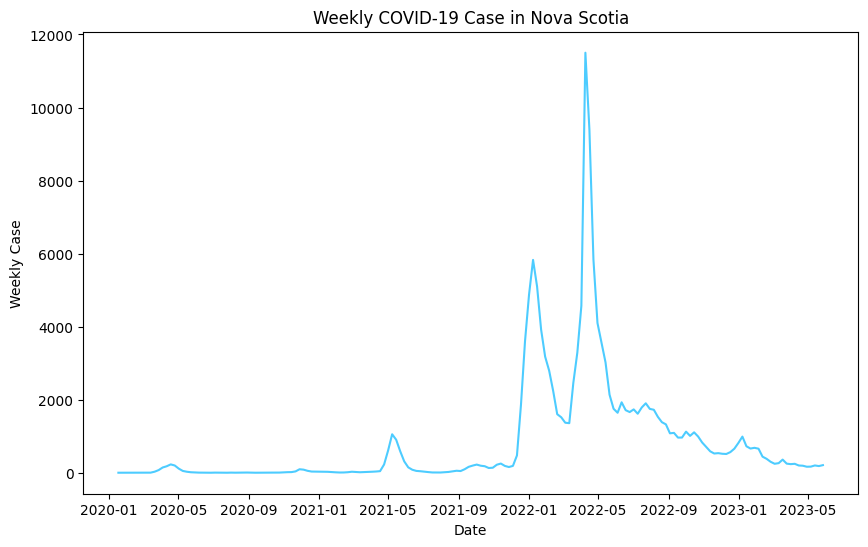

In [19]:
plt.rcParams['figure.figsize'] = (10, 6)
p = sns.lineplot(ns_df, y = ns_df['numtotal_last7'], x = ns_df['date'], color = (0.3, 0.8, 1.0))
_ = p.set(title = 'Weekly COVID-19 Case in Nova Scotia', xlabel = 'Date', ylabel = 'Weekly Case')

There were three major pikes occurred around May 2021, January 2022, and May 2022.

## 2. Covid Prediction by AR & ARIMA

In [20]:
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

from plotly import tools

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

### 2.1 Set date as index

In [21]:
ns_df.set_index('date', inplace = True)
# please execute this code ONCE! Or there would be an error as follows...

In [22]:
ns_df.head()

,numtotal_last7
date,
2020-01-18,0.0
2020-01-25,0.0
2020-02-01,0.0
2020-02-08,0.0
2020-02-15,0.0


In [23]:
ns_df.tail()

,numtotal_last7
date,
2023-04-29,164.0
2023-05-06,167.0
2023-05-13,199.0
2023-05-20,182.0
2023-05-27,208.0


### 2.2 Decompose the Data into Trend, Period, and Others (Mainly Residual).

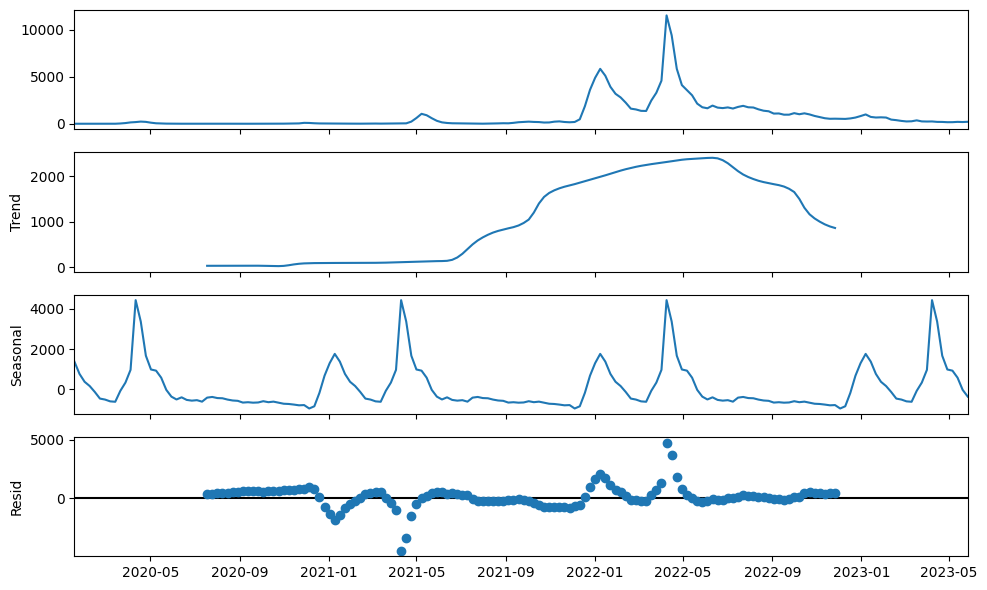

From top to bottom: Original Data, Trend, Period, "Residuals".


In [24]:
deco = sm.tsa.seasonal_decompose(ns_df, model='additive')
fig = deco.plot()
plt.rcParams["figure.figsize"] = (13,15)
plt.show()
print('From top to bottom: Original Data, Trend, Period, "Residuals".')

The residual Turbulated violently mostly when there's severe outbreak. However, there's an exception around January 2021.

In [25]:
deco.resid.describe()

count     124.000000
mean      122.177114
std       973.106057
min     -4510.544040
25%      -225.570482
50%       136.750832
75%       516.127034
max      4754.898268
Name: resid, dtype: float64

In [26]:
deco.resid.isnull().sum()

52

In [27]:
# forward fill residuals
residuals = deco.resid
residuals = residuals.ffill()
residuals.isnull().sum()

26

In [28]:
# backward fill residuals
residuals = residuals.bfill()
residuals.isnull().sum()

0

In [29]:
residuals.describe()

count     176.000000
mean      207.785542
std       826.760341
min     -4510.544040
25%      -104.186668
50%       375.417499
75%       448.439935
max      4754.898268
Name: resid, dtype: float64

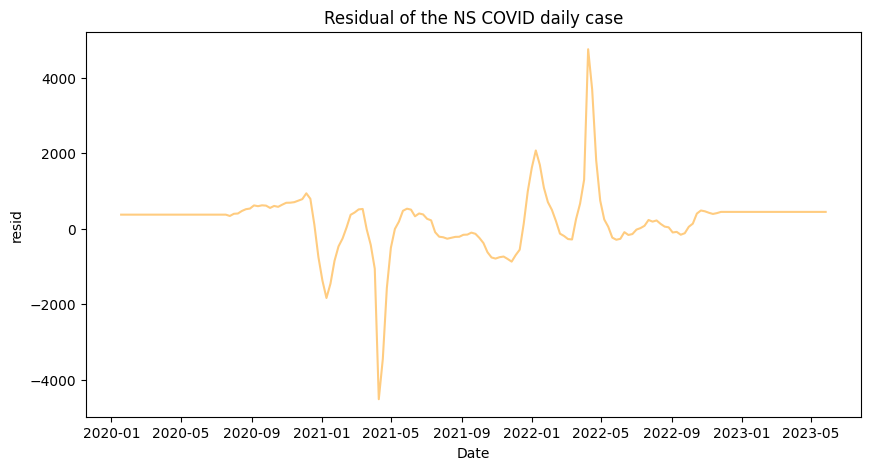

In [31]:
# visulization
plt.rcParams['figure.figsize'] = 10, 5
p = sns.lineplot(residuals, color = (1, 0.8, 0.5))
_ = p.set(title = 'Residual of the NS COVID daily case', xlabel = 'Date')

### 2.3 See the Stationary (Absolute/Relative) of the data

For residuals

In [32]:
ADFresult = adfuller(residuals)

In [33]:
'''
H0: The time series data is NOT Relatively Stationary
H1: The time series data is Relatively Stationary
alpha = 0.05
'''
statistic_val = ADFresult[0]
p_val = ADFresult[1]
print(f'Statistic value: {statistic_val}')
print('Critical Statistic Value and its corresponding Alpha in percentage:')
for percent in ADFresult[4]:
  print('\tAlpha:', percent, '\t', 'Statistic Value:', ADFresult[4][percent])
print(f'P-value = {p_val}')
if p_val < 0.05: print('P < alpha, reject H0, this time series data is statistically Relatively Stationary')
else: print('P < alpha, fail to reject H0, this time series data is NOT statistically Relatively Stationary')

Statistic value: -6.007324434362454
Critical Statistic Value and its corresponding Alpha in percentage:
	Alpha: 1% 	 Statistic Value: -3.4685016947910636
	Alpha: 5% 	 Statistic Value: -2.8782983668563396
	Alpha: 10% 	 Statistic Value: -2.57570415906989
P-value = 1.6039334721370005e-07
P < alpha, reject H0, this time series data is statistically Relatively Stationary


For Trend

In [34]:
trends = deco.trend
trends.describe()
# 52 null values

count     124.000000
mean     1037.955490
std       919.590520
min        22.576923
25%        93.463942
50%       887.182692
75%      1941.860577
max      2404.961538
Name: trend, dtype: float64

In [35]:
trends = trends.ffill()
trends.isnull().sum()

26

In [36]:
trends = trends.bfill()
trends.describe()

count     176.000000
mean      862.877732
std       848.082084
min        22.576923
25%        70.641827
50%       861.144231
75%      1742.336538
max      2404.961538
Name: trend, dtype: float64

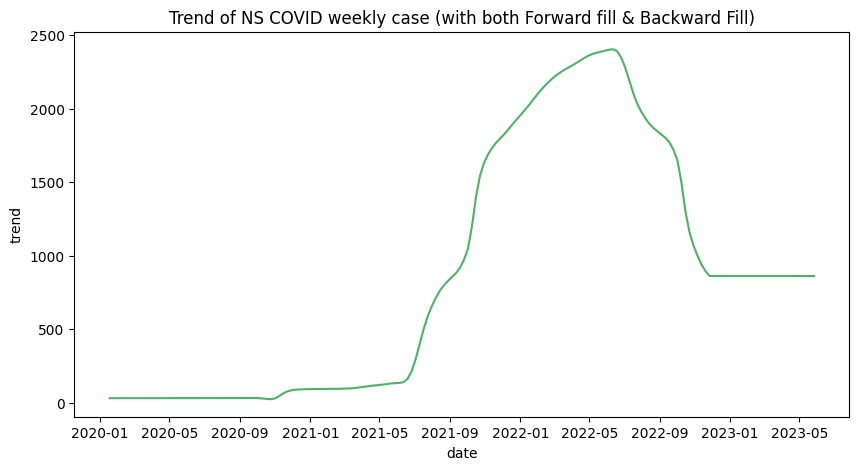

In [37]:
p = sns.lineplot(trends, color = (0.3, 0.7, 0.4))
_ = p.set(title = 'Trend of NS COVID weekly case (with both Forward fill & Backward Fill)')

In [38]:
ADFResults = adfuller(trends)

In [39]:
'''
H0: The time series data is NOT Absolute Stationary
H1: The time series data is Absolute Stationary
alpha = 0.05
'''
statistic_val = ADFResults[0]
p_val = ADFResults[1]
print(f'Statistic value: {statistic_val}')
print('Critical Statistic Value and its corresponding Alpha in percentage:')
for percent in ADFResults[4]:
  print('\tAlpha:', percent, '\t', 'Statistic Value:', ADFResults[4][percent])
print(f'P-value = {p_val}')
if p_val < 0.05: print('P < alpha, reject H0, this time series data is statistically Absolute Stationary')
else: print('P < alpha, fail to reject H0, this time series data is NOT statistically Absolute Stationary')

Statistic value: -2.4427898385141367
Critical Statistic Value and its corresponding Alpha in percentage:
	Alpha: 1% 	 Statistic Value: -3.47086589632514
	Alpha: 5% 	 Statistic Value: -2.879330279087651
	Alpha: 10% 	 Statistic Value: -2.57625492712671
P-value = 0.1300215872946569
P < alpha, fail to reject H0, this time series data is NOT statistically Absolute Stationary


Despite the potential tortion from the massive filling, it still see the statistically significant trend...

###  2.4 Determine the Time-Series Model: Use ACF and PACF

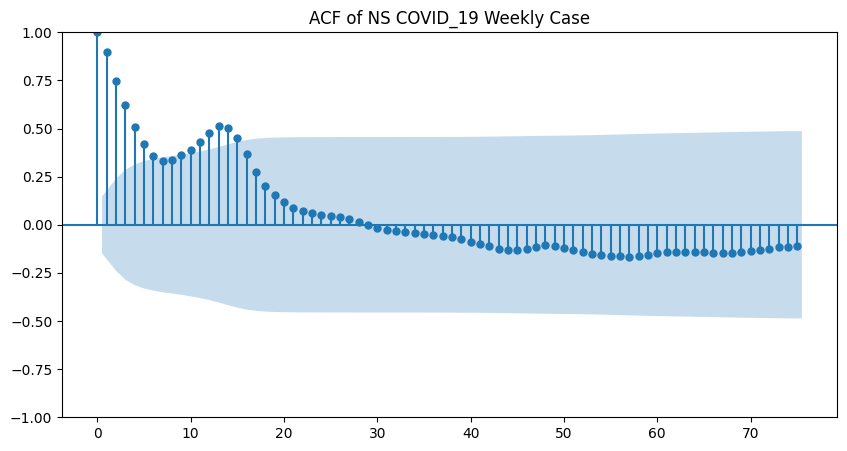

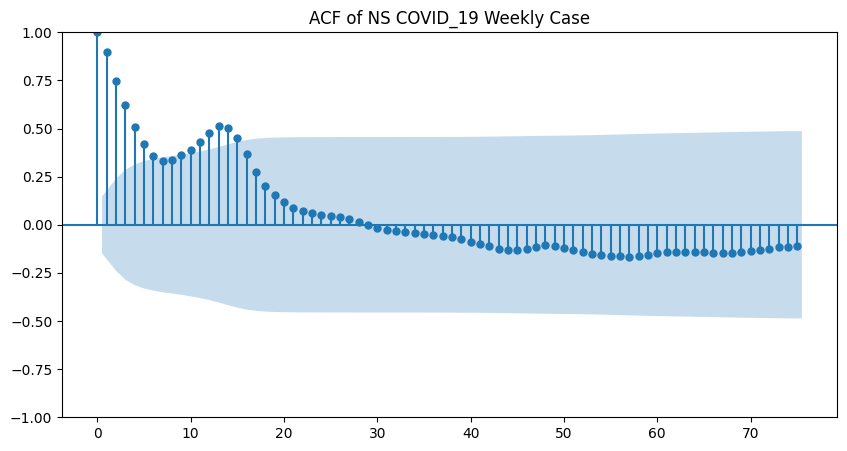

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ns_df,lags=75,title="ACF of NS COVID_19 Weekly Case")

Seems a bit lagging in ACF though (lagging = 16, tail-off)

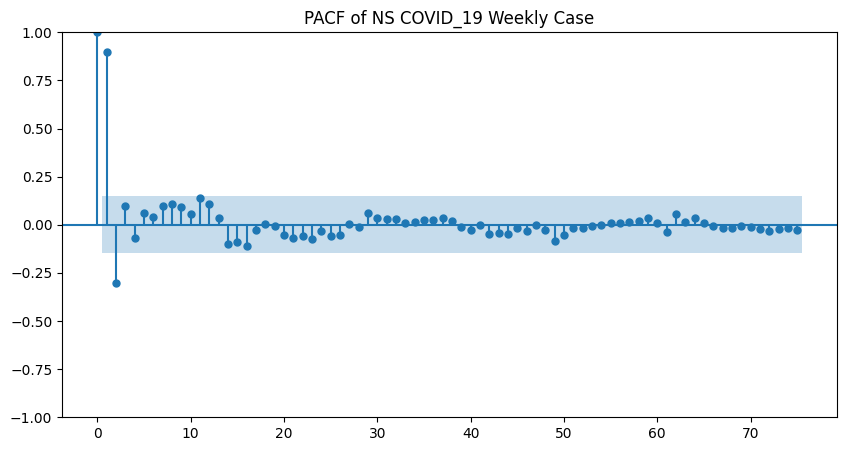

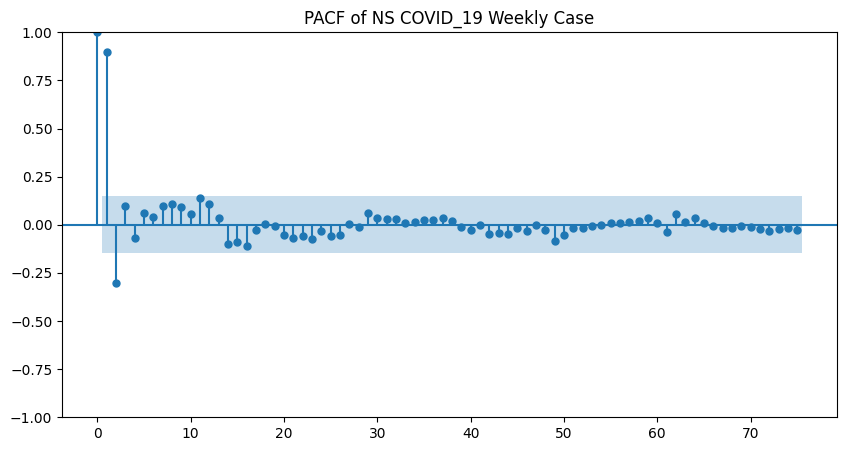

In [41]:
plot_pacf(ns_df, lags = 75, title = 'PACF of NS COVID_19 Weekly Case')

However, its PACF seems to be far less lagging (lags = 3) comparing to that of ACF, which means "cuts-off".

Therefore, we might have to use AR(3)<br>
(ref: https://stats.stackexchange.com/questions/241914/terms-cut-off-and-tail-off-about-acf-pacf-functions)

### 2.5 Use AR(3) to predict the pandemic

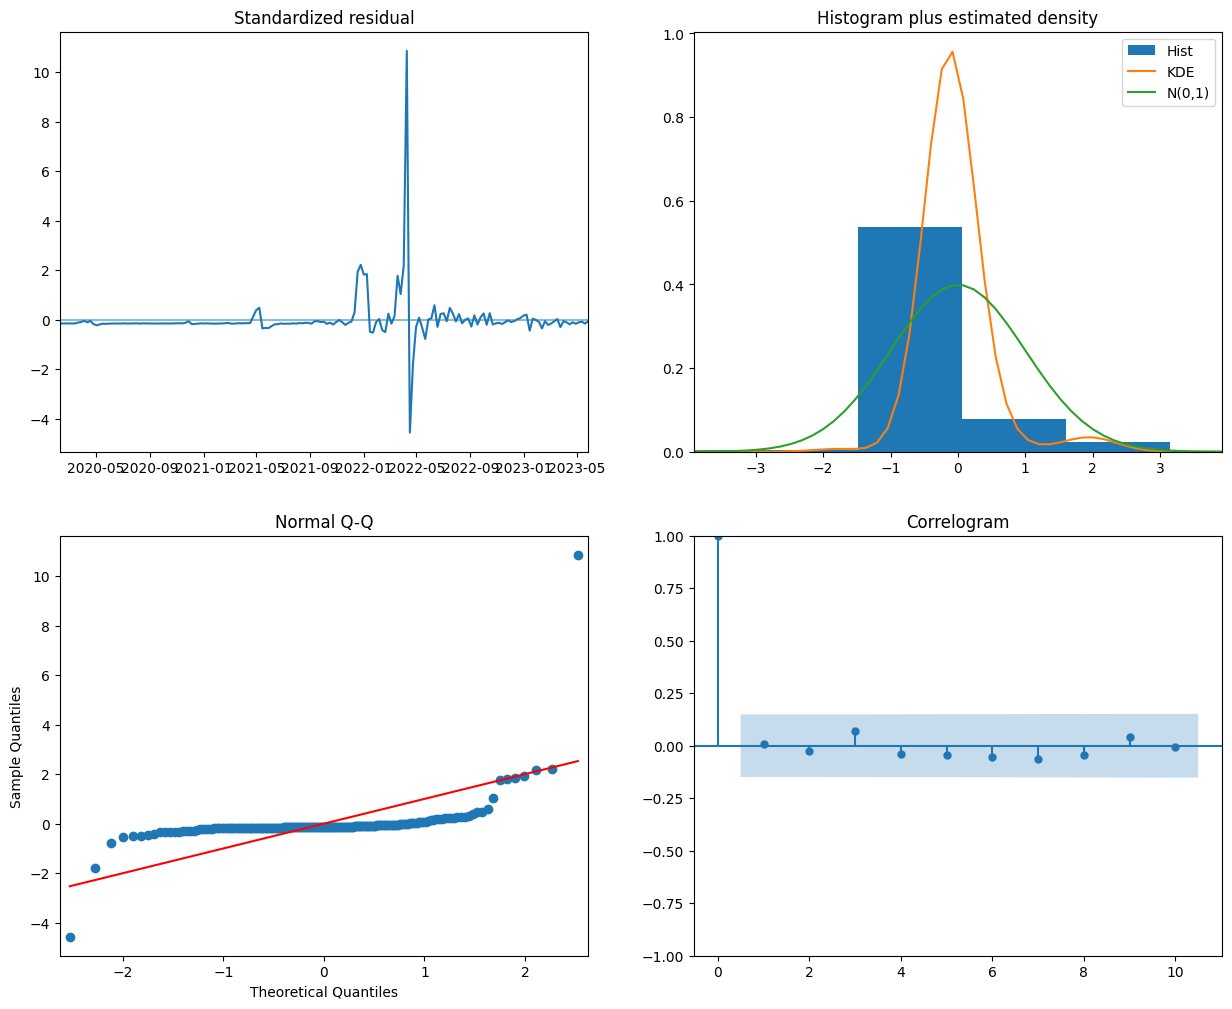

In [42]:
from statsmodels.tsa.ar_model import AutoReg
mod = AutoReg(ns_df, lags = 3)

TSresults = mod.fit()

#print(TSresults.summary().tables[1])

TSresults.plot_diagnostics(figsize=(15, 12))
plt.show()

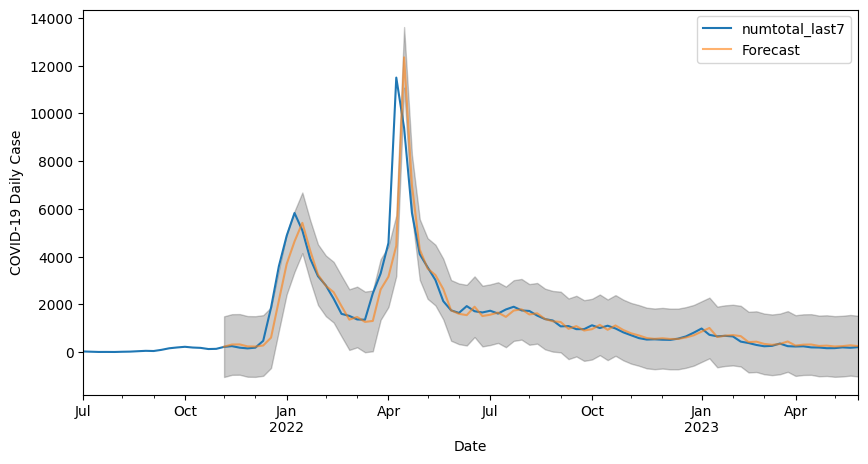

In [43]:
pred = TSresults.get_prediction(start=pd.to_datetime('2021-11-06'), dynamic=False)
pred_ci = pred.conf_int()
#Returns the confidence interval of the fitted parameters.

ax = ns_df['2021-07':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.6)

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('COVID-19 Daily Case')
plt.legend()

plt.show()

In [44]:
y_forecasted = pred.predicted_mean
y_truth = ns_df['numtotal_last7']['2021-11':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
rmse = mse ** 0.5
std_err = ((y_forecasted - y_truth) ** 2).std() / (len(y_forecasted) ** 0.5)
print(f'The Root Mean Squared Error of our forecasts is {round(rmse, 2)}')
print(f'The 95% CI of RMSE is [{round((mse - 1.96 * std_err) ** 0.5, 2)}, {round((mse + 1.96 * std_err) ** 0.5, 2)}]')

The Root Mean Squared Error of our forecasts is 934.83
The 95% CI of RMSE is [nan, 1440.27]


The result is a bit laggy, and it failed to predict the 2nd and biggest outbreak, even with 95% CI.

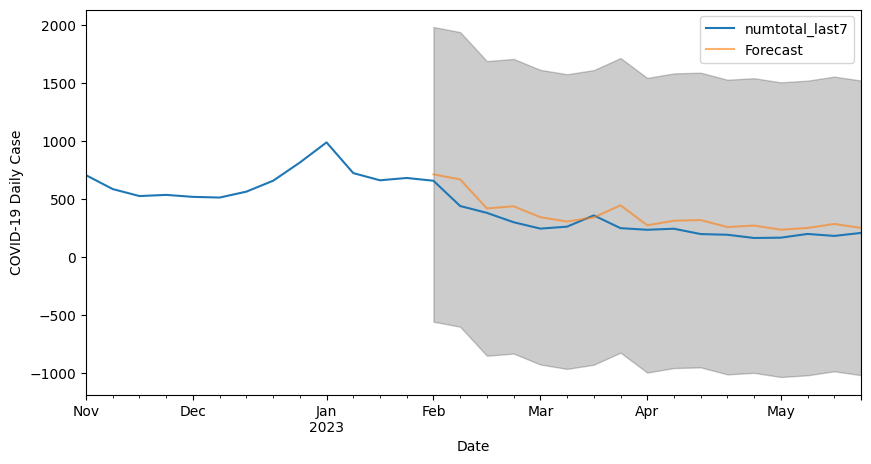

In [45]:
pred = TSresults.get_prediction(start=pd.to_datetime('2023-02-04'), dynamic=False)
pred_ci = pred.conf_int()
#Returns the confidence interval of the fitted parameters.

ax = ns_df['2022-11':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.6)

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('COVID-19 Daily Case')
plt.legend()

plt.show()

In [46]:
y_forecasted = pred.predicted_mean
y_truth = ns_df['numtotal_last7']['2023-02':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
rmse = mse ** 0.5
std_err = ((y_forecasted - y_truth) ** 2).std() / (len(y_forecasted) ** 0.5)
print(f'The Root Mean Squared Error of our forecasts is {round(rmse, 2)}')
print(f'The 95% CI of RMSE is [{round((mse - 1.96 * std_err) ** 0.5, 2)}, {round((mse + 1.96 * std_err) ** 0.5, 2)}]')

The Root Mean Squared Error of our forecasts is 103.96
The 95% CI of RMSE is [63.07, 132.81]


This model is still laggy though, yet it could predict the pandemic when there's no significant outbreak. Despite its result is a bit pessimistic.

2.6 Use ARIMA to predict the pandemic

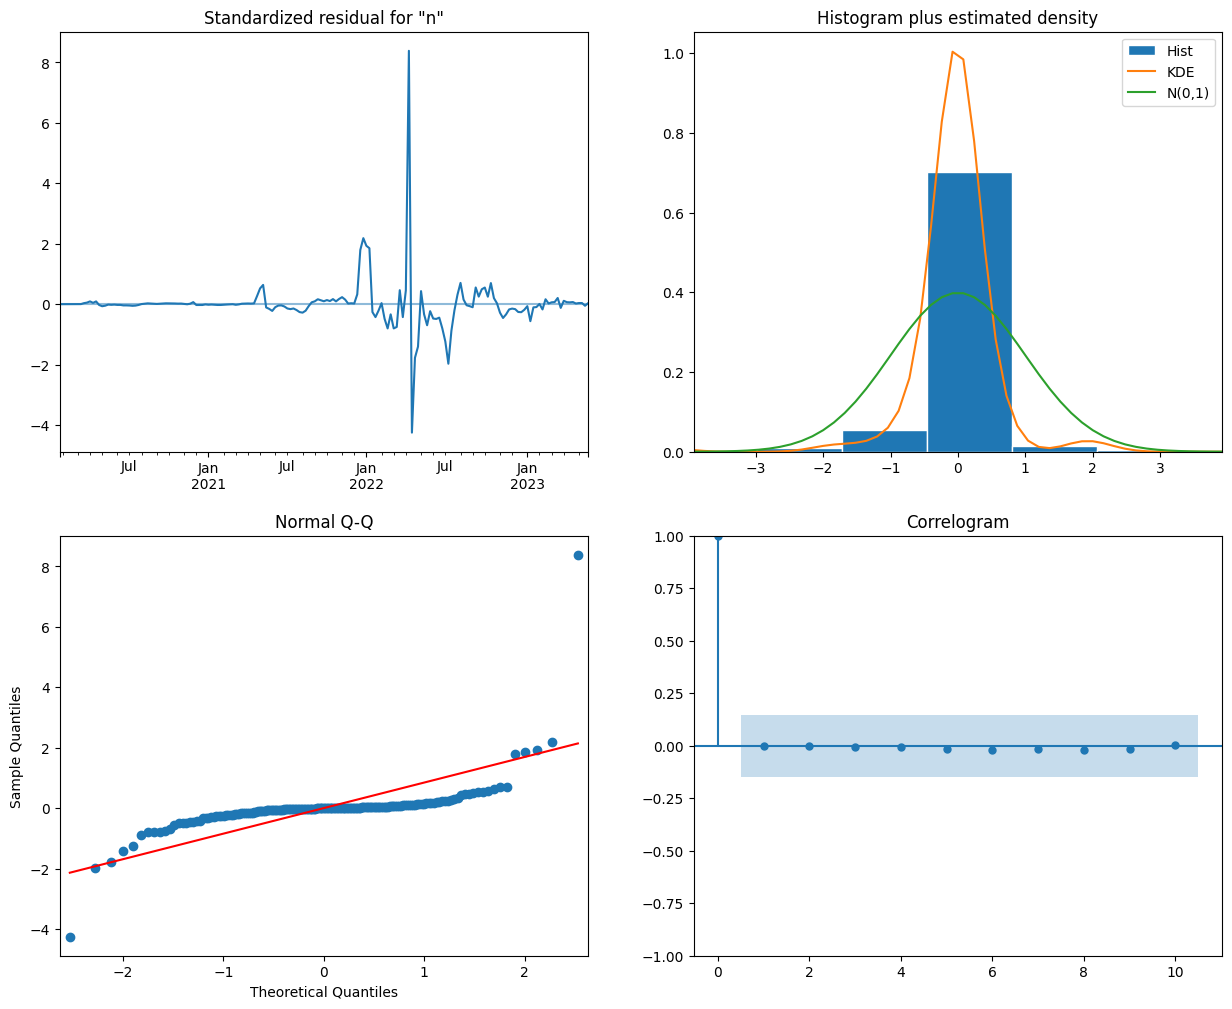

In [65]:
from statsmodels.tsa.arima.model import ARIMA

ns_df = df[df['prname'] == 'Nova Scotia'][['date', 'numtotal_last7']]
ns_df = ns_df[~ns_df['numtotal_last7'].isnull()]
ns_df['date'] = pd.to_datetime(ns_df['date'])

ns_df.set_index('date', inplace = True)

mod = ARIMA(ns_df, order=(5, 1, 11))

TSresults = mod.fit()

#print(TSresults.summary().tables[1])

TSresults.plot_diagnostics(figsize=(15, 12))
plt.show()

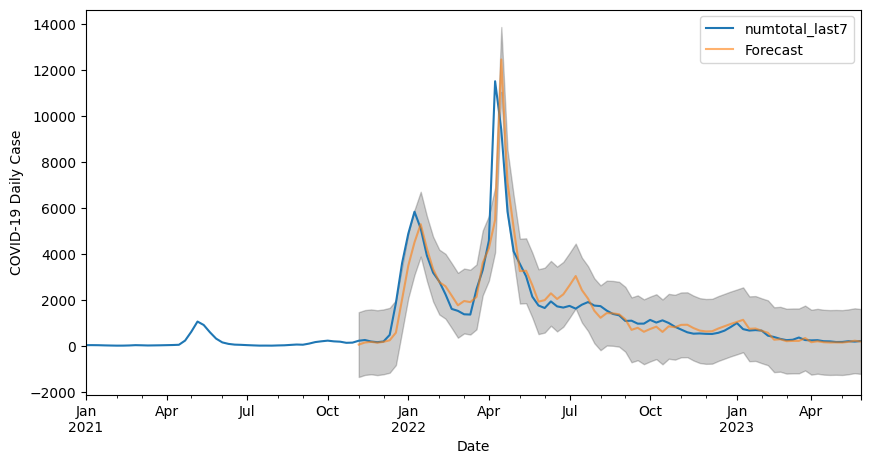

In [66]:
pred = TSresults.get_prediction(start=pd.to_datetime('2021-11-06'), dynamic=False)
pred_ci = pred.conf_int()
#Returns the confidence interval of the fitted parameters.

ax = ns_df['2021':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.6)

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('COVID-19 Daily Case')
plt.legend()

plt.show()

In [67]:
y_forecasted = pred.predicted_mean
y_truth = ns_df['numtotal_last7']['2021-11':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
rmse = mse ** 0.5
std_err = ((y_forecasted - y_truth) ** 2).std() / (len(y_forecasted) ** 0.5)
print(f'The Root Mean Squared Error of our forecasts is {round(rmse, 2)}')
print(f'The 95% CI of RMSE is [{round((mse - 1.96 * std_err) ** 0.5, 2)}, {round((mse + 1.96 * std_err) ** 0.5, 2)}]')

The Root Mean Squared Error of our forecasts is 883.12
The 95% CI of RMSE is [nan, 1294.3]


Slightly better...Though it falsly predicted two minor outbreaks around July 2022 and January 2023.

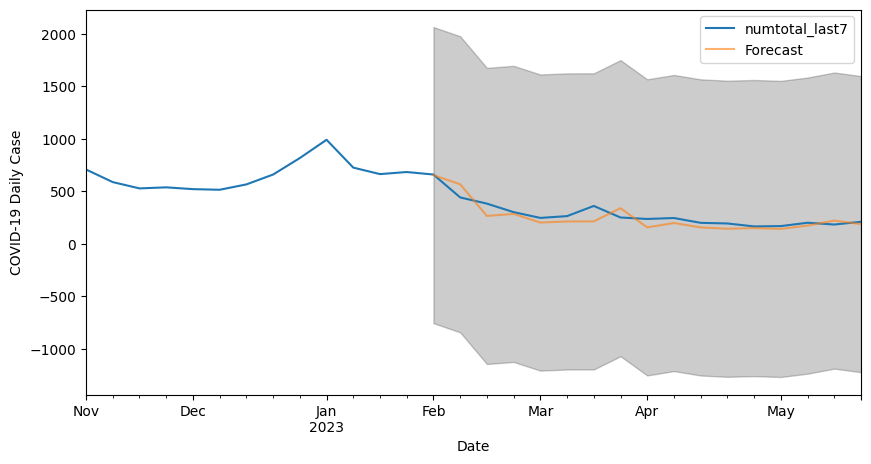

In [68]:
pred = TSresults.get_prediction(start=pd.to_datetime('2023-02-04'), dynamic=False)
pred_ci = pred.conf_int()
#Returns the confidence interval of the fitted parameters.

ax = ns_df['2022-11':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.6)

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('COVID-19 Daily Case')
plt.legend()

plt.show()

In [69]:
y_forecasted = pred.predicted_mean
y_truth = ns_df['numtotal_last7']['2023-02':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
rmse = mse ** 0.5
std_err = ((y_forecasted - y_truth) ** 2).std() / (len(y_forecasted) ** 0.5)
print(f'The Root Mean Squared Error of our forecasts is {round(rmse, 2)}')
print(f'The 95% CI of RMSE is [{round((mse - 1.96 * std_err) ** 0.5, 2)}, {round((mse + 1.96 * std_err) ** 0.5, 2)}]')

The Root Mean Squared Error of our forecasts is 68.8
The 95% CI of RMSE is [41.18, 88.16]


it performs better when there's no significant fluctration.

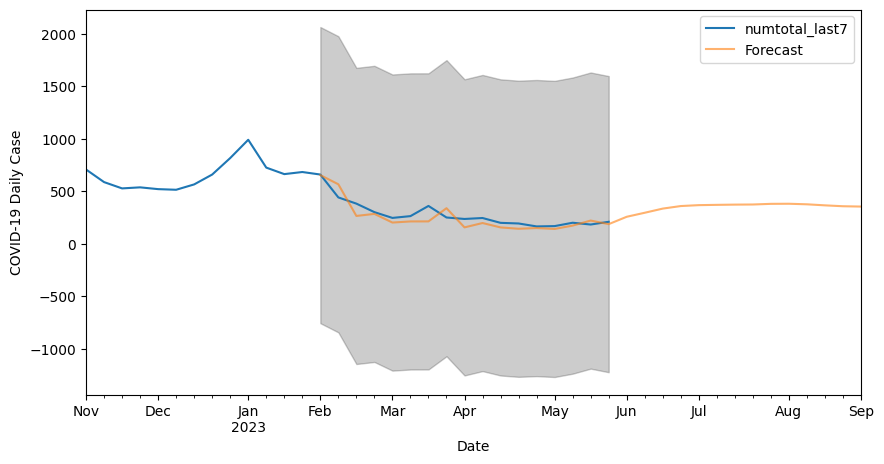

In [72]:
# output the predicted result
pred = TSresults.predict(start=pd.to_datetime('2023-02-04'), end = pd.to_datetime('2023-09'), dynamic=False)
# pred_ci = pred.conf_int()
#Returns the confidence interval of the fitted parameters.

ax = ns_df['2022-11':].plot(label='observed')
pred.plot(ax=ax, label='Forecast', alpha=.6)

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('COVID-19 Daily Case')
plt.legend()

## 3. Conclusion

The ARIMA tends to better predict the pandemic when there's no significant outbreak. However, the AR and ARIMA tend to be lagging while performing such a prediction. To alleviate such a problem, **more factors should be taken into consideration instead of just considering the chrographical variation of data itself.**<br>

Based on this model, the situation for the "incoming" month (from June to August) is generally stable and with no significant outbreak, which complies to the real local situation.